## Shark Attacks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
# Provide just the filename since it's in the same folder
filepath = "Resources/attacks.csv"

# read the CSV file
raw_df = pd.read_csv(filepath, encoding='latin1')

In [3]:
raw_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
# make compatiable with dot notation
raw_df.columns = raw_df.columns.str.strip()
raw_df.columns = [x.lower().replace(" ", "_") for x in raw_df.columns]

raw_df.rename(columns={"fatal_(y/n)": "fatal"}, inplace=True)


In [5]:
raw_df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

#### Clean Data

In [6]:
# drop unnessary columns
cols = ['date', 'year', 'type', 'country', 'area', 'location', 'activity', 'sex', 'age', 'injury', 'fatal', 'time', 'species']
df = raw_df.loc[:, cols]
df.head()

,date,year,type,country,area,location,activity,sex,age,injury,fatal,time,species
0,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6302 non-null   object 
 1   year      6300 non-null   float64
 2   type      6298 non-null   object 
 3   country   6252 non-null   object 
 4   area      5847 non-null   object 
 5   location  5762 non-null   object 
 6   activity  5758 non-null   object 
 7   sex       5737 non-null   object 
 8   age       3471 non-null   object 
 9   injury    6274 non-null   object 
 10  fatal     5763 non-null   object 
 11  time      2948 non-null   object 
 12  species   3464 non-null   object 
dtypes: float64(1), object(12)
memory usage: 2.6+ MB


In [8]:
# see what values are in the 'sex' series and start to clean column
df["sex"].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

##### Clean Column 'Sex'

In [9]:
# create a mask
sex_check = df.loc[df["sex"].isin(["nan", "lli", "N", "."])]

# print the rows there are in to view data
print(sex_check) # with only 4 rows of data - feel safe to delete
df = df.drop(sex_check.index)

# change 'M ' to standard 'M'
replace = {"M ": "M"}

# replace
df["sex"] = df["sex"].replace(replace)

# take a look after cleaning sex column -  should be M, F and nan
df.sex.unique()

                      date    year          type           country  \
1624             11-Nov-04  2004.0    Unprovoked               USA   
4938             11-Jul-34  1934.0       Boating         AUSTRALIA   
5437  Reported 02-Jun-1908  1908.0  Sea Disaster  PAPUA NEW GUINEA   
6131  Reported 18-Dec-1801  1801.0      Provoked               NaN   

                 area                                        location  \
1624       California  Bunkers, Humboldt Bay, Eureka, Humboldt County   
4938  New South Wales                                        Cronulla   
5437      New Britain                                          Matupi   
6131              NaN                                             NaN   

                             activity  sex  age  \
1624                          Surfing  lli   38   
4938                          Fishing    N  NaN   
5437                                .    .  NaN   
6131  Standing on landed shark's tail    N  NaN   

                           

array(['F', 'M', nan], dtype=object)

##### Clean Column 'Type'

In [10]:
df.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [11]:
# create a mask
type_check = df.loc[df["type"].isin(["Boatomg"])]

# print the rows there are in to view data
print(type_check) # shows just 1 row

# change 'Boatomg', 'Sea Disaster' and 'Boat' to 'Boating'to condense data 
type_replace = {"Boatomg": "Boating", "Boat": "Boating", "Sea Disaster": "Boating"}
df.type = df.type.replace(type_replace)

# change 'Invalid' and 'Questionable' to Unknown
type_replace2 = {"Invalid": "Unknown", "Questionable": "Unknown"}
df["type"] = df.type.replace(type_replace2)

# check cleaned unique values in type 
df.type.unique()

          date    year     type      country          area  location activity  \
1152  1-Mar-09  2009.0  Boatomg  NEW ZEALAND  North Island  Taranaki  Fishing   

     sex  age                                       injury fatal time species  
1152   M  NaN  No injury to occupants, shark bit propeller     N  NaN     NaN  


array(['Boating', 'Unprovoked', 'Unknown', 'Provoked', nan], dtype=object)

##### Clean Column 'Fatal'

In [12]:
df.fatal.unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [13]:
# create a mask
fatal_check = df.loc[df["fatal"].isin(["M", "2017"])]

# print the rows there are in to view data
print(fatal_check) # with only 2 rows of data - feel safe to delete
df = df.drop(fatal_check.index)

# take ' N ' 'N ' and 'y ' and fix typos
fatal_replace = {" N": "N", "N ": "N", "y": "Y"}
df.fatal = df.fatal.replace(fatal_replace)

# standaridize 'UNKNOWN' to 'Unknown'
unknown_replace = {"UNKNOWN": "Unknown"}
df.fatal = df.fatal.replace(unknown_replace)

# take a look after cleaning sex column -  should be M, F and nan
df.fatal.unique()

          date    year      type           country      area      location  \
285  18-Apr-16  2016.0  Provoked  FRENCH POLYNESIA  Tuamotos  Makemo Atoll   
786  10-Jun-12  2012.0  Provoked             ITALY  Sardinia      Muravera   

                                            activity sex age  \
285                                     Spearfishing   M  22   
786  Attempting to rescue an injured & beached shark   M  57   

                                                injury fatal     time  \
285  Laceration to knee by speared shark PROVOKED I...     M  Morning   
786           Lower left leg injured PROVOKED ACCIDENT  2017  Morning   

                  species  
285  Grey reef shark, 2 m  
786      Blue shark, 2.5m  


array(['N', 'Y', nan, 'Unknown'], dtype=object)

##### Clean 'Date' and 'Year'

In [14]:
# get rid of any words added to the date
df.date = df.date.astype(str)
df.loc[df["date"].str.startswith("Reported "), "date"] = df.date.str.replace("Reported ", "")

# standardize dates
df.date = pd.to_datetime(df.date, errors="coerce")

In [15]:
# Convert 'year' column to string
df['year'] = df['year'].astype(str)

# Remove decimal points from each string in the 'year' column
df['year'] = df['year'].apply(lambda x: x.split('.')[0])

# Display the DataFrame to verify the changes
df.year.unique

<bound method Series.unique of 0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
25718     nan
25719     nan
25720     nan
25721     nan
25722     nan
Name: year, Length: 25717, dtype: object>

In [16]:
# clean dates
df['date'] = pd.to_datetime(df['date'])
unique_years = df['date'].dt.year.unique()

# remove typoes from the dates
df['date'] = pd.to_datetime(df['date'])
unique_years = df['date'].dt.year.unique()
unique_years = unique_years.astype(int)
typos_mask = (unique_years > 2020)
print(unique_years[typos_mask])

# unique_years[typos_mask] -= 100
df = df[~(df['date'].dt.year > 2022)]

[2073 2072 2071 2070 2069 2068 2067 2066 2065 2064 2054 2063 2062 2061
 2060 2059 2058 2057 2056 2055 2053 2052 2051 2050 2049 2048 2047 2046
 2045 2044 2043 2042 2041 2040 2039 2038 2037 2036 2035 2034 2033 2032
 2031 2030 2029 2028 2027 2026 2025 2024 2023 2022 2021]


C:\Users\Kelsey\AppData\Local\Temp\ipykernel_19200\320012998.py:8: RuntimeWarning: invalid value encountered in cast
  unique_years = unique_years.astype(int)


##### Categorize Column 'Activity'

In [17]:
# take a look at value counts of activity to see the different categories
df.activity.value_counts()

Surfing                                                                                                                                                                   931
Swimming                                                                                                                                                                  657
Fishing                                                                                                                                                                   290
Spearfishing                                                                                                                                                              232
Bathing                                                                                                                                                                   137
                                                                                                                                  

In [18]:
# create key words to search for to simplify activity values
activity_key_dict = {
    "Surf": "Surfing",
    "board": "Surfing",
    "Swim": "Swimming",
    "Rowing": "Boating",
    "Canoeingg": "Boating",
    "kayaking": "Boating",
    "boat": "Boating",
    "Cruising": "Boating",
    "Treading": "Swimming",
    "Fish": "Fishing",
    "Float": "Floating",
    "Kite": "Kitboarding",
    "Disaster": "Accident",
    "drifted": "Accident",
    "overboard": "Accident",
    "capsized": "Accident",
    "sank": "Accident",
    "wreck": "Accident",
    "crash": "Accident",
    "sunk": "Accident",
    "Navy": "Accident",
    "fell": "Accident",
    "sharks": "Handling a Shark",
    "shark": "Handling a Shark",
    "washing": "In Shallow Water",
    "playing": "In Shallow Water",
    "standing": "In Shallow Water",
    "sitting": "In Shallow Water",
    "splashing": "In Shallow Water",
    "jumped": "Entered Water",
    "jumping": "Entered Water",
    "Escaping": "Entered Water",
    "drill": "Entered Water",
    "diving": "Diving",
    "dived": "Diving",
    "Snorkeling": "Diving",
    "netting": "Fishing",
    "crabbing": "Fishing",
    "clamming": "Fishing",
    "Bathing": "Bathing",
    "SUP": "Paddleboarding"
}
# fill any null values
df["activity"] = df["activity"].fillna("Unknown")

# apply all search keys to values in activites to sort unique vaules into categories for plotting
for search_key, activity in activity_key_dict.items():
    contains_search_key = df.activity.str.contains(search_key, case=False)
    df.loc[contains_search_key, "activity"] = activity

# any specifically unique species values not categorized rename as other
unique_activity = df.activity.value_counts()[df.activity.value_counts() == 1].index.tolist()
df.loc[df.activity.isin(unique_activity), "activity"] = "Other"

# rename typoes and blank space
dotrow = df[df["activity"] == "."]
dot_activity = df[df["activity"] == "."].index
df.loc[dot_activity, "activity"] = "Unknown"

activity_spacerow = df[df["activity"] == ""]
activity_space = df[df["activity"] == ""].index
df.loc[activity_space, "activity"] = "Unknown"

In [19]:
df.activity.value_counts()

Unknown                       19836
Surfing                        1397
Swimming                        797
Fishing                         742
Diving                          436
Bathing                         155
Boating                         145
Other                           134
Wading                          121
In Shallow Water                117
Accident                         97
Handling a Shark                 87
Floating                         34
Walking                          15
Entered Water                    15
Canoeing                         11
Sailing                           8
Murder                            6
Dangling feet in the water        5
Paddleskiing                      4
Paddleboarding                    3
Ocean racing                      2
Paddling                          2
Jet skiing                        2
Suicide                           2
Name: activity, dtype: int64

In [20]:
df.activity.unique()

array(['Paddling', 'In Shallow Water', 'Surfing', 'Diving', 'Swimming',
       'Fishing', 'Walking', 'Handling a Shark', 'Other', 'Wading',
       'Unknown', 'Boating', 'Bathing', 'Canoeing', 'Paddleboarding',
       'Floating', 'Accident', 'Sailing', 'Entered Water', 'Jet skiing',
       'Murder', 'Paddleskiing', 'Dangling feet in the water',
       'Ocean racing', 'Suicide'], dtype=object)

In [21]:
df.activity.nunique()

25

##### Categorize Column 'Species'

In [22]:
# show value counts of species 
df.species.value_counts()

White shark                                                                                                                      134
Shark involvement not confirmed                                                                                                   74
Shark involvement prior to death was not confirmed                                                                                62
Invalid                                                                                                                           61
Tiger shark                                                                                                                       58
                                                                                                                                ... 
5' to 7' shark                                                                                                                     1
12' to 18' shark                                                     

In [23]:
# make any blank entries unknown species
df["species"] = df["species"].fillna("Unknown")

# create key words to search for to simplify species values
species_key_dict = {
    "bull": "Bull Shark",
    "tiger": "Tiger Shark",
    "lemon": "Lemon Shark",
    "nurse": "Nurse Shark",
    "white": "Great White Shark",
    "wobbegong": "Wobbegong Shark",
    "reef": "Reef Shark",
    "Blacktip": "Blacktip Shark",
    "Hammerhead": "Hammerhead Shark",
    "Mako": "Mako Shark",
    "Zambesi": "Zambesi Shark",
    "Raggedtooth": "Raggedtooth Shark",
    "not confirmed": "Unknown",
    "unconfirmed": "Unknown",
    "Invalid": "Unknown",
    "Possibly": "Unknown",
    "Probable": "Unknown",
    "Unidentified": "Unknown",
    "Unknown": "Unknown",
    "Bronze": "Bronze Whaler Shark",
    "sand": "Sand Shark",
    "questionable": "No Shark Sighted",
    "doubtful": "No Shark Sighted",
    "not cofirmed": "No Shark Sighted",
    "pack": "Multiple Sharks",
    "school": "Multiple Sharks",
    "Multiple": "Multiple Sharks",
    "juvenile": "Unknown Juvenile Shark",
    "Blue pointer": "Mako Shark",
    "bonito": "Mako Shark",
    "Silvertip": "Silvertip Shark",
    "Porbeagle": "Porbeagle Shark",
    "Spinner": "Spinner Shark",
    "dogfish": "Dogfish Shark",
    "Squalidae": "Dogfish Shark",
    "Spurdogs": "Dogfish Shark",
    "Goblin": "Goblin Shark",
    "Dusky": "Dusky Shark",
    "basking": "Baskign Shark",
    "Scyliorhinus": "Dogfish Shark",
    "dog": "Dogfish Shark",
    "blue shark": "Great Blue Shark",
    "sevengill": "SevenGill Shark",
    "black tipped": "Black Tipped Shark",
    "Zambesi": "Zambesi Shark",
    "Copper": "Copper Shark",
    "bronze whaler": "Copper Shark",
    "narrowtooth": "Copper Shark",
    "whaler": "Dusky Shark",
    "Triakis semifasciata": "Leopard Shark",
    "Leopard": "Lepoard Shark",
    "angle": "Angleshark",
    "monkfish": "Angleshark",
    "\xa0": "Unknown"
}

# apply all search keys to values in activites to sort unique vaules into 
for search_key, species in species_key_dict.items():
    contains_search_key = df.species.str.contains(search_key, case=False)
    df.loc[contains_search_key, "species"] = species

# function to rename all unreported species values or unknown species to 'unknown shark'
def rename_shark_species(species):
    if species[0].isdigit():
        return "Unknown"
    elif " to " in str(species) or " m " in str(species):
        return "Unknown"
    elif "small" in species or "large" in species:
        return "Unknown"
    elif "Small" in species or "Large" in species:
        return "Unknown"
    else: 
        return species
df.species = df.species.apply(rename_shark_species)

# any specifically unique species values not categorized rename as unknown
unknown_species = df.species.value_counts()[df.species.value_counts() == 1].index.tolist()
df.loc[df.species.isin(unknown_species), "species"] = "Unknown"

spacerow = df[df['species'] == " "]
space_species = df[df["species"] == " "].index
df.loc[space_species, "species"] = "Unknown"

In [24]:
df.species.value_counts()

Unknown                   22636
Great White Shark           521
Tiger Shark                 222
Bull Shark                  170
Blacktip Shark               78
No Shark Sighted             68
Reef Shark                   58
Nurse Shark                  51
Copper Shark                 50
Mako Shark                   41
Raggedtooth Shark            40
Wobbegong Shark              31
Hammerhead Shark             30
Lemon Shark                  26
Great Blue Shark             22
No shark involvement         21
Spinner Shark                17
Sand Shark                   14
Zambesi Shark                12
SevenGill Shark              12
Dusky Shark                   9
Unknown Juvenile Shark        7
Dogfish Shark                 7
Angel shark                   5
Porbeagle Shark               5
Baskign Shark                 4
Galapagos shark               3
Multiple Sharks               3
Goblin Shark                  2
Salmon shark                  2
Seven-gill shark              2
Silverti

In [25]:
df.species.unique()

array(['Great White Shark', 'Unknown', 'Tiger Shark', 'Lemon Shark',
       'Bull Shark', 'Reef Shark', 'Nurse Shark', 'No Shark Sighted',
       'Wobbegong Shark', 'Blacktip Shark', 'Great Blue Shark',
       'Spinner Shark', 'Porbeagle Shark', 'Seven-gill shark',
       'SevenGill Shark', 'Angel shark', 'Dogfish Shark', 'Mako Shark',
       'Copper Shark', 'No shark involvement', 'Galapagos shark',
       'Hammerhead Shark', 'Unknown Juvenile Shark', 'Raggedtooth Shark',
       'Goblin Shark', 'Sand Shark', 'Salmon shark', 'Zambesi Shark',
       'Dusky Shark', 'Baskign Shark', 'Silvertip Shark', 'Whale shark',
       'Multiple Sharks'], dtype=object)

In [26]:
df.species.nunique()

33

##### Categorize Column 'Injury'

In [27]:
# view values of injury column
df.injury.unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [28]:
# make any blank entries unknown species
df.injury = df.injury.fillna("Unknown")

# create key words to search for and rename to simplify injury values
injury_key_dict = {
    "fatal": "Fatal",
    "killed": "Fatal",
    "arm": "Arm",
    "elbow": "Arm",
    "shoulder": "Arm",
    "leg": "Leg",
    "thigh": "Thigh",
    "shin": "Leg",
    "torso": "Torso",
    "chest": "Torso",
    "no injury": "No Injury",
    "foot": "Foot",
    "calf": "Calf",
    "ankle": "Ankle",
    "hand": "Hand",
    "fingers": "Hand",
    "finger": "Hand",
    "heel": "Foot",
    "toe": "Foot",
    "hip": "Hip",
    "wrist": "Hand",
    "knee": "Knee",
    "No Injury": "No Injury",
    "boat": "No Injury",
    "post-mortem": "Unknown",
    "Abdomen": "Torso",
    "drowning": "Drowned",
    "Drowned": "Drowned",
    "buttocks": "Hip",
    "buttock": "Hip",
    "back": "Torso",
    "post mortem": "Unknown",
    "remains found": "Unknown",
    "prior to death": "Unknown",
    "Missing": "Unknown",
    "head": "Head",
    "ribs": "Torso",
    "groin": "Hips",
    "cheek": "Head",
    "Calves": "Leg",
    "face": "Head",
    "thumb": "Hand",
    "femur": "Hip",
    "No inury": "No Injury",
    "PROVOKED": "Unknown",
    "not confirmed": "Unknown",
    "Minor injuries": "Unknown",
    "Abrasion": "Abrasions",
    "uninjured": "No Injury",
    "been taken": "Unknown",
    "Swim fin": "Swimgear Bitten"
    
}

# apply all search keys to values in injury to sort unique vaules into assosicated categories
for search_key, injury in injury_key_dict.items():
    contains_search_key = df.injury.str.contains(search_key, case=False)
    df.loc[contains_search_key, "injury"] = injury

# any specifitally unique injury values not categorized rename as other
unique_injury = df.injury.value_counts()[df.injury.value_counts() == 1].index.tolist()
df.loc[df.injury.isin(unique_injury), "injury"] = "Other"

In [29]:
df.injury.unique()

array(['No Injury', 'Thigh', 'Leg', 'Fatal', 'Foot', 'Hand', 'Arm',
       'Other', 'Ankle', 'Calf', 'Unknown', 'Abrasions', 'Hip', 'Torso',
       'Drowned', 'Knee', 'Head', 'Minor injury', 'No details',
       'Lacerations', 'Survived', 'Hips', 'Swimgear Bitten',
       'Disappeared, but shark involvement unconfirmed', 'Recovered'],
      dtype=object)

In [30]:
df.injury.value_counts()

Unknown                                           19543
Fatal                                              1003
Foot                                                650
No Injury                                           610
Leg                                                 607
Arm                                                 408
Hand                                                313
Thigh                                               228
Other                                               176
Calf                                                168
Ankle                                                85
Survived                                             75
Torso                                                68
Drowned                                              63
Knee                                                 40
No details                                           33
Head                                                 32
Hip                                             

In [31]:
df.injury.nunique()

25

In [32]:
df.head()

,date,year,type,country,area,location,activity,sex,age,injury,fatal,time,species
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,No Injury,N,18h00,Great White Shark
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",In Shallow Water,F,11,Thigh,N,14h00 -15h00,Unknown
2,2018-06-09,2018,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Leg,N,07h45,Unknown
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Leg,N,NaN,Unknown
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Diving,M,NaN,Leg,N,NaN,Tiger Shark


## Visualization

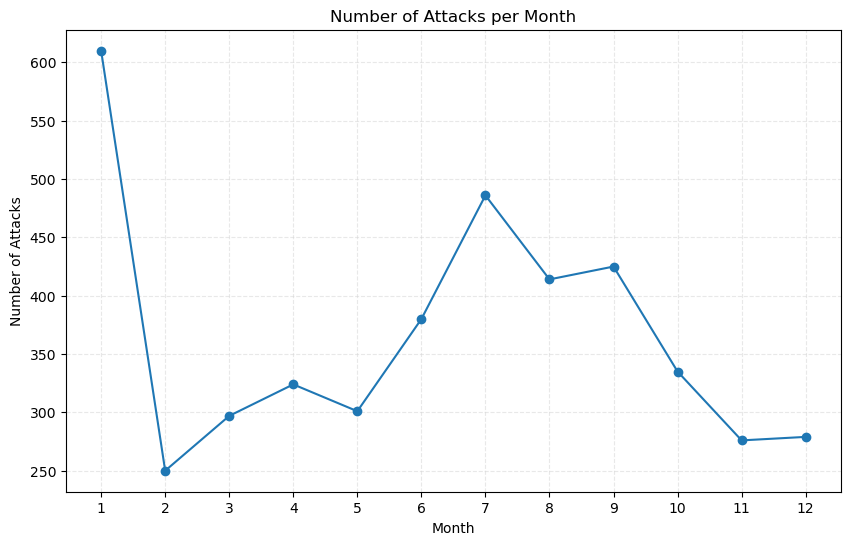

In [33]:
# Extract month from the 'date' column
df["month"] = df["date"].dt.month

# Count attacks per month
attacks_per_month = df['month'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
attacks_per_month.plot(marker='o', linestyle='-')

plt.title('Number of Attacks per Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(range(1, 13))  # Set ticks for each month
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.show()

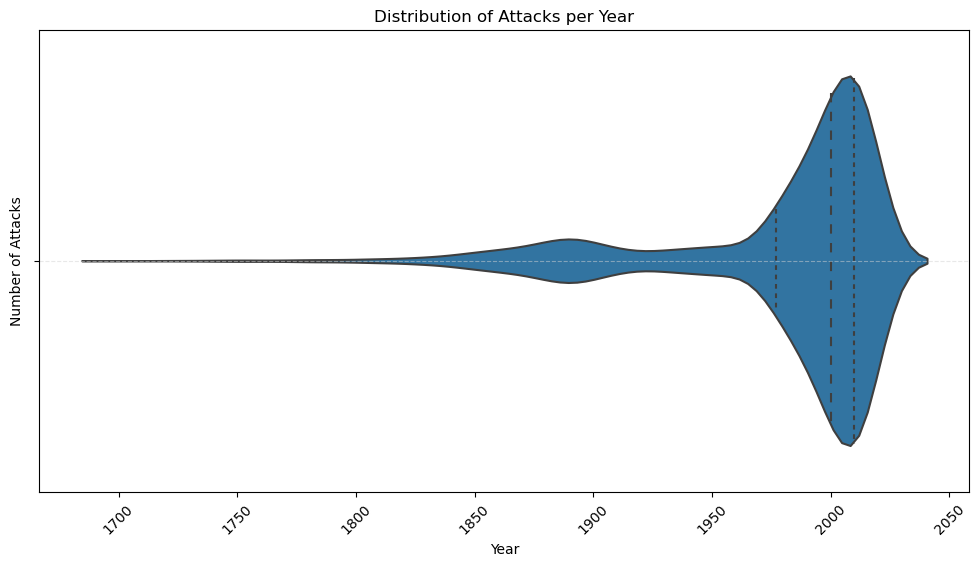

In [34]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', data=df, inner='quartile')  # Set inner parameter to quartile for quartiles to be drawn inside the violins
plt.title('Distribution of Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=.5)
plt.show()

#### Gender and Shark Attacks

In [35]:
bar_graph_data = df[["sex", "activity"]].copy()
bar_graph_data.dropna(inplace=True)
bar_graph_data.head(20)

,sex,activity
0,F,Paddling
1,F,In Shallow Water
2,M,Surfing
3,M,Surfing
4,M,Diving
5,M,Surfing
6,M,Swimming
7,M,Fishing
8,M,Walking
9,M,In Shallow Water


In [36]:
df.groupby("age").size()

age
             2
10          47
10 or 12     1
11          33
12          59
            ..
mid-20s      1
mid-30s      1
teen         5
young        1
             1
Length: 121, dtype: int64

In [37]:
df.fatal.value_counts()

N          3319
Y           981
Unknown      53
Name: fatal, dtype: int64

In [38]:
ages = ['57', '11', '48', '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '68', '51', '39', '58',
       '47', '61', '65', '36', '66', '43', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '53',
        '77', '74', '5', '86',
        '84', '75']
df2 = df.loc[df.age.isin(ages)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2525 entries, 0 to 6301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2466 non-null   datetime64[ns]
 1   year      2466 non-null   float64       
 2   type      2524 non-null   object        
 3   country   2520 non-null   object        
 4   area      2454 non-null   object        
 5   location  2431 non-null   object        
 6   activity  2525 non-null   object        
 7   sex       2510 non-null   object        
 8   age       2525 non-null   object        
 9   injury    2525 non-null   object        
 10  fatal     2364 non-null   object        
 11  time      1792 non-null   object        
 12  species   2525 non-null   object        
 13  month     2466 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 295.9+ KB


In [39]:
df2["age"] = pd.to_numeric(df2["age"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2525 entries, 0 to 6301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2466 non-null   datetime64[ns]
 1   year      2466 non-null   float64       
 2   type      2524 non-null   object        
 3   country   2520 non-null   object        
 4   area      2454 non-null   object        
 5   location  2431 non-null   object        
 6   activity  2525 non-null   object        
 7   sex       2510 non-null   object        
 8   age       2525 non-null   int64         
 9   injury    2525 non-null   object        
 10  fatal     2364 non-null   object        
 11  time      1792 non-null   object        
 12  species   2525 non-null   object        
 13  month     2466 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 295.9+ KB


C:\Users\Kelsey\AppData\Local\Temp\ipykernel_19200\3601731725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["age"] = pd.to_numeric(df2["age"])


In [40]:
age_df = df2.groupby("age").size().reset_index()
age_df.columns = ["age", "num_attacks"]
age_df.head()

,age,num_attacks
0,3,3
1,5,6
2,6,13
3,7,21
4,8,19


In [41]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          75 non-null     int64
 1   num_attacks  75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


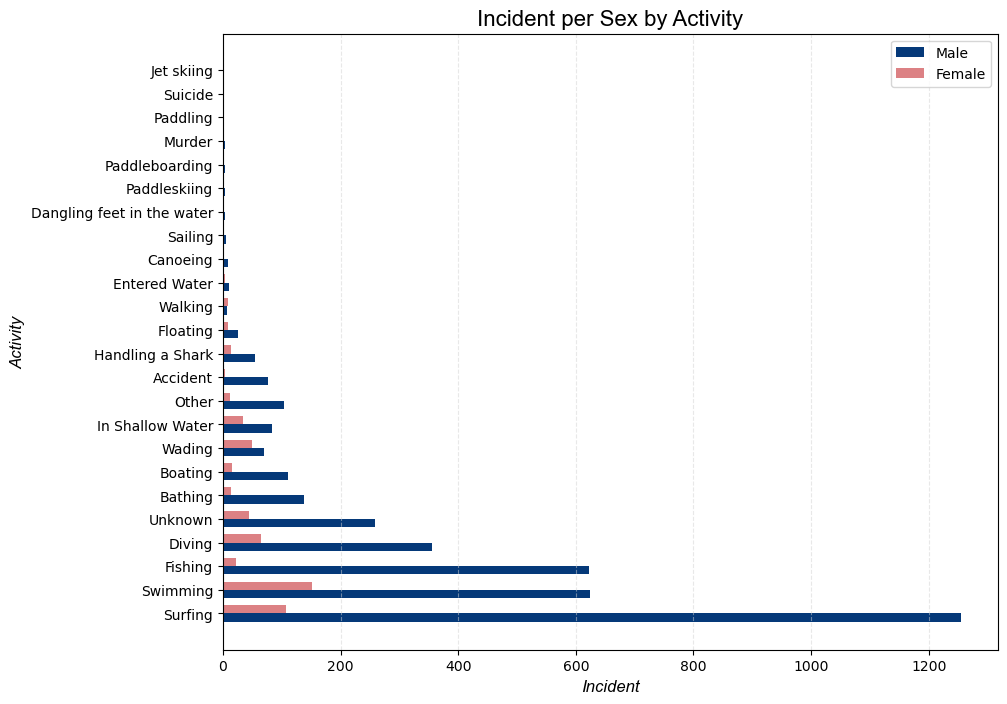

In [42]:
# create a bar graph to show the activity count per sex
# groupby data per activity and sex
activity_per_sex = bar_graph_data.groupby("activity")["sex"].value_counts().unstack(fill_value=0)

male = activity_per_sex["M"]
female = activity_per_sex["F"]

activity_per_sex_sorted = activity_per_sex.sum(axis=1).sort_values(ascending=False)
activities_sorted = activity_per_sex_sorted.index

bar_height = 0.35

r1 = range(len(activities_sorted))
r2 = [x + bar_height for x in r1]

# create canvas
plt.figure(figsize=(10,8))
plt.barh(r1, activity_per_sex.loc[activities_sorted, "M"], color="#053979", height=bar_height, label="Male")
plt.barh(r2, activity_per_sex.loc[activities_sorted, "F"], color="#dc8184", height=bar_height, label="Female")

# customize
plt.xlabel("Incident", fontsize=12, fontstyle="italic", fontfamily="Arial")
plt.yticks([r + bar_height/2 for r in range(len(activities_sorted))], activities_sorted)
plt.ylabel("Activity", fontsize=12, fontstyle="italic", fontfamily="Arial")
plt.title("Incident per Sex by Activity", fontsize=16, fontfamily="Arial")
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=.5)
plt.legend()
plt.show()

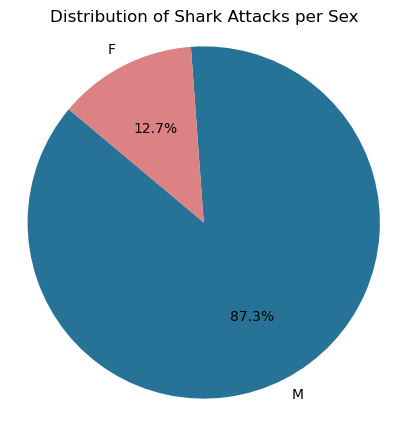

In [43]:
count_per_gender = df['sex'].value_counts()

colors = ["#277397", "#dc8184"]

plt.figure(figsize=(5, 5))
plt.pie(count_per_gender, labels=count_per_gender.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Shark Attacks per Sex')
plt.axis('equal')
plt.show()

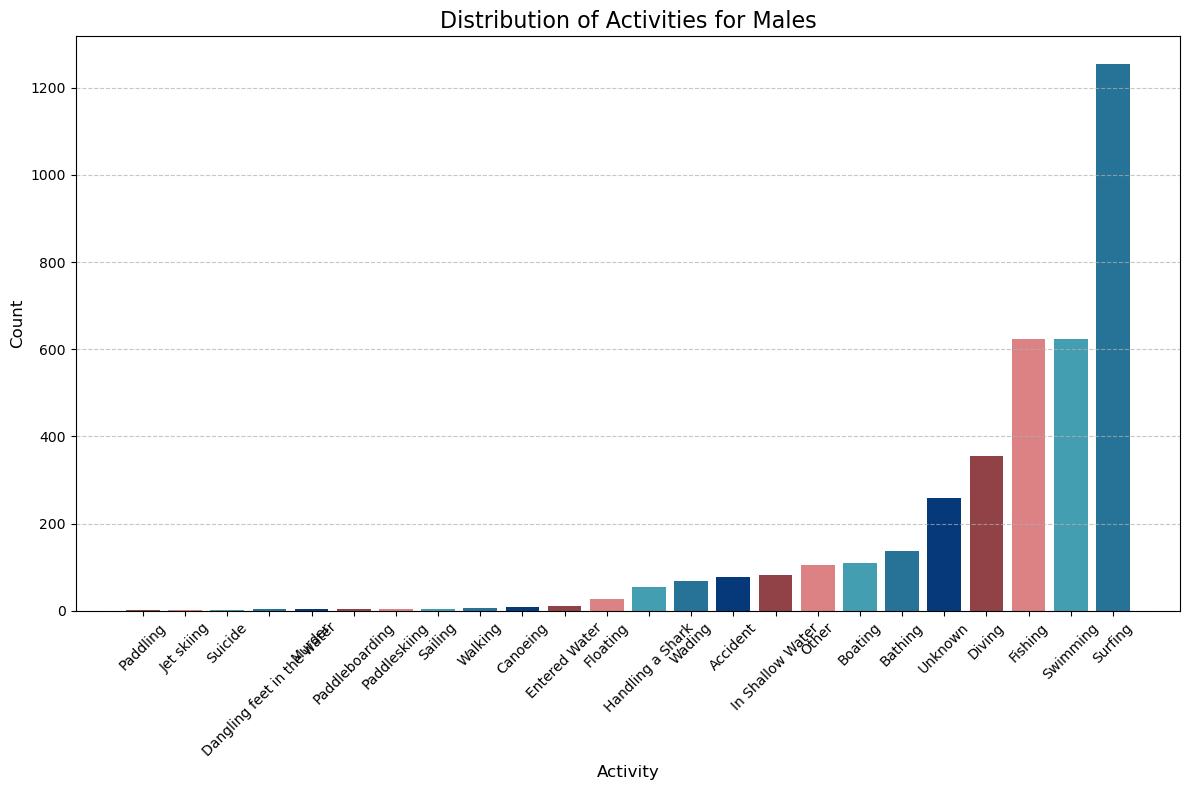

In [44]:
# Filter the data for males
male_data = df[df['sex'] == 'M']

# Count the occurrences of each activity for males
male_activity_counts = male_data['activity'].value_counts().sort_values(ascending=True)

# Define the colors for the bars
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# Create a bar graph with specified colors
plt.figure(figsize=(12, 8))
bars = plt.bar(male_activity_counts.index, male_activity_counts, color=colors)

plt.title('Distribution of Activities for Males', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

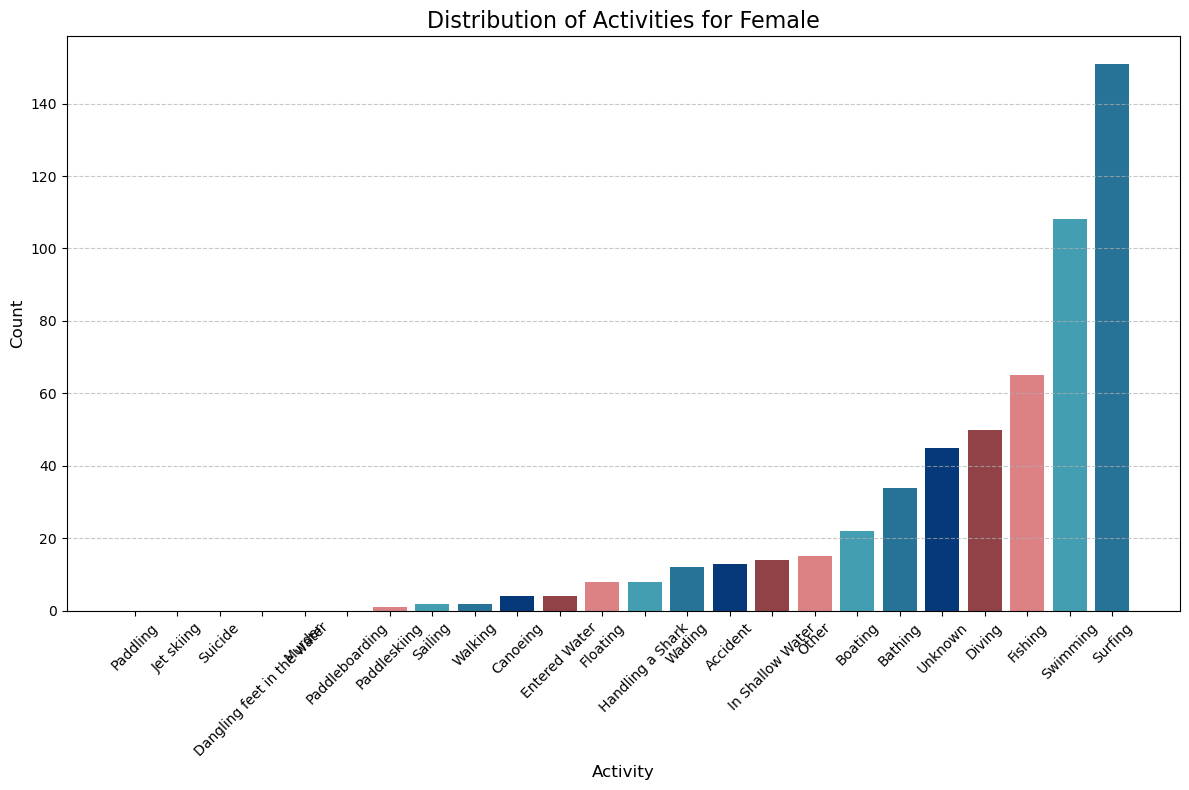

In [47]:
# Filter the data for females
female_data = df[df['sex'] == 'F']

# Count the occurrences of each activity for males
female_activity_counts = female_activity_counts.reindex(male_activity_counts.index, fill_value=0).sort_values(ascending=True)

# Define the colors for the bars
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# Create a bar graph with specified colors
plt.figure(figsize=(12, 8))
bars = plt.bar(male_activity_counts.index, female_activity_counts, color=colors)

plt.title('Distribution of Activities for Female', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

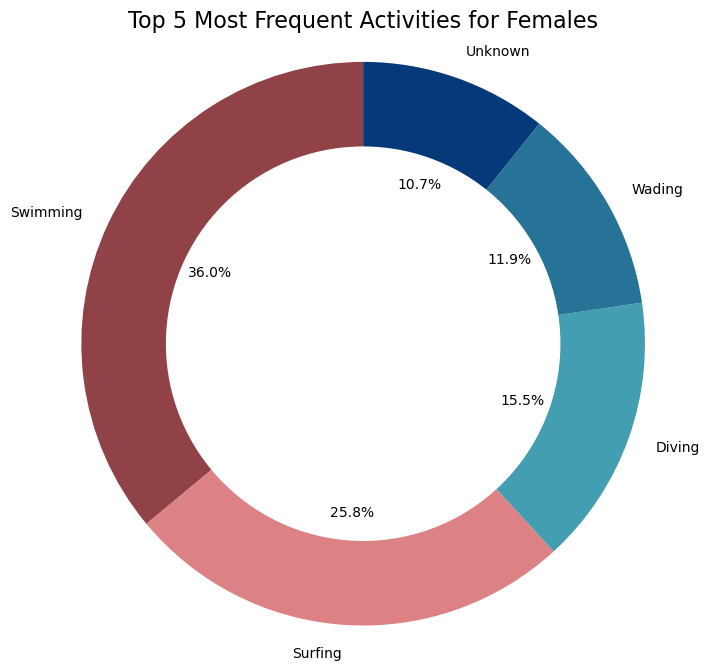

In [48]:
# Filter the data for females
female_data = df[df['sex'] == 'F']

# Count the occurrences of each activity for females
female_activity_counts = female_data['activity'].value_counts().sort_values(ascending=True)

# Select the top N most frequent activities to display
top_n = 5  # Number of top activities to display
top_activities = female_activity_counts.nlargest(top_n)

# Define the colors for the donut chart
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# Create a donut chart for the top N most frequent activities
plt.figure(figsize=(8, 8))
plt.pie(top_activities, labels=top_activities.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title(f'Top {top_n} Most Frequent Activities for Females', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

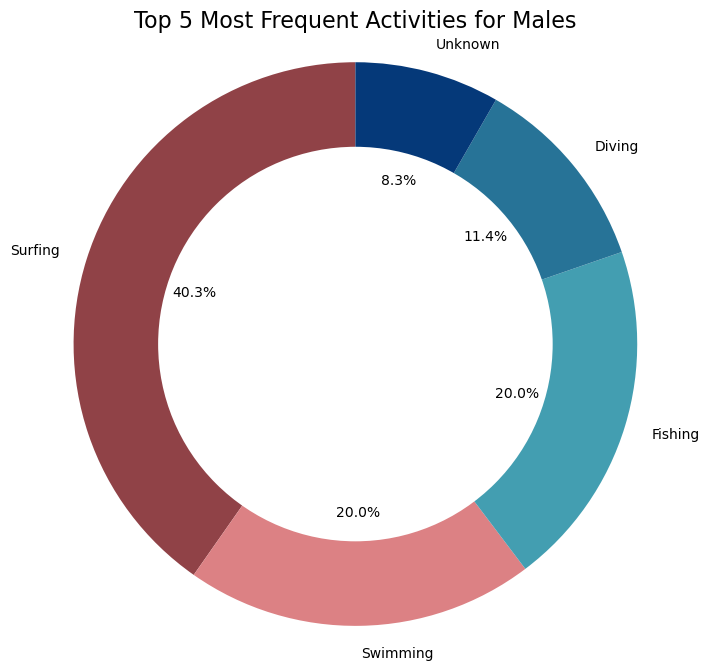

In [49]:
# Filter the data for males
male_data = df[df['sex'] == 'M']

# Count the occurrences of each activity for males
male_activity_counts = male_data['activity'].value_counts().sort_values(ascending=True)

# Select the top N most frequent activities to display
top_n = 5  # Number of top activities to display
top_activities = male_activity_counts.nlargest(top_n)

# Define the colors for the donut chart
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# Create a donut chart for the top N most frequent activities for males
plt.figure(figsize=(8, 8))
plt.pie(top_activities, labels=top_activities.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title(f'Top {top_n} Most Frequent Activities for Males', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

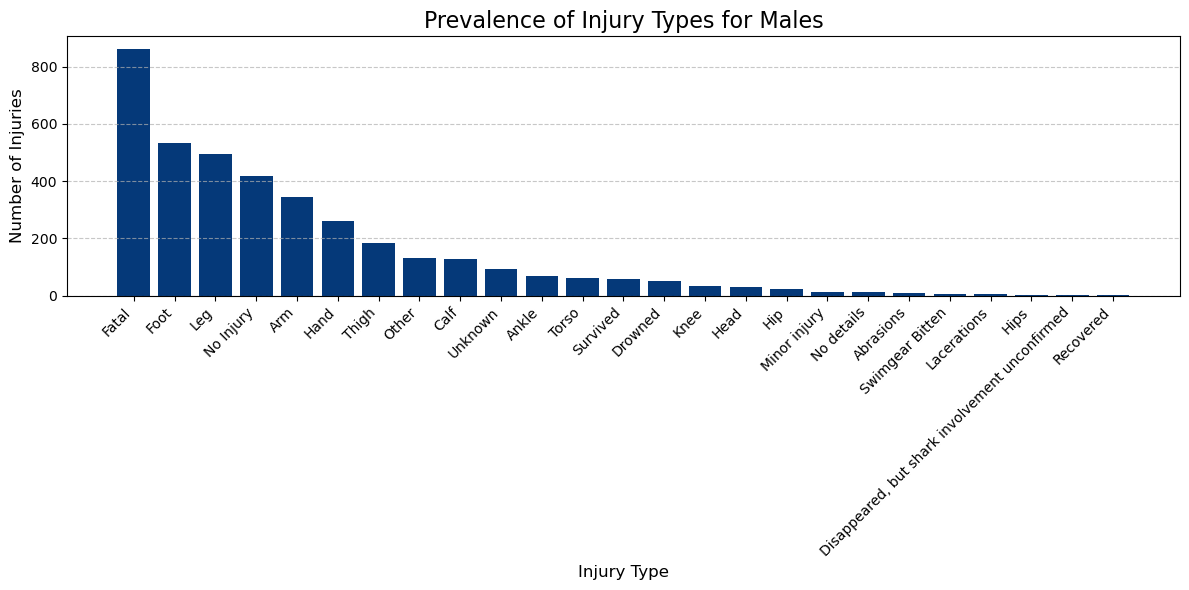

In [50]:
# Filter the data for males
male_data = df[df['sex'] == 'M']

# Count the occurrences of each injury type for males
injuries_per_type_male = male_data['injury'].value_counts()

# Create a bar graph for the prevalence of injury types for males
plt.figure(figsize=(12, 6))
plt.bar(injuries_per_type_male.index, injuries_per_type_male, color='#053979')
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.title('Prevalence of Injury Types for Males', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

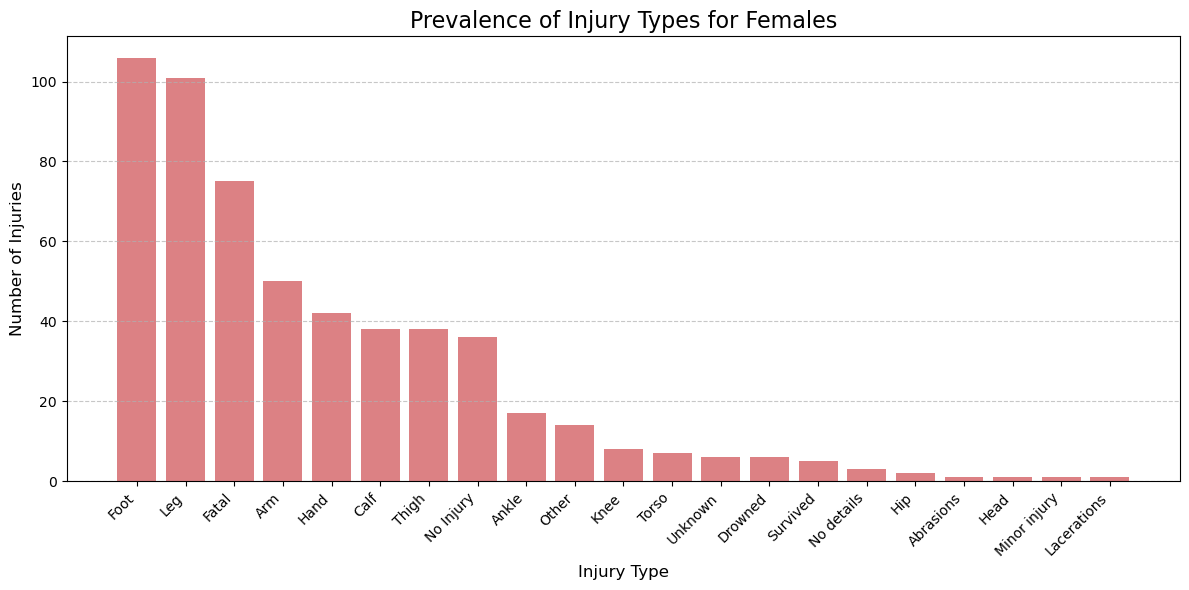

In [51]:
# Filter the data for females
female_data = df[df['sex'] == 'F']

# Count the occurrences of each injury type for females
injuries_per_type_female = female_data['injury'].value_counts()

# Create a bar graph for the prevalence of injury types for females
plt.figure(figsize=(12, 6))
plt.bar(injuries_per_type_female.index, injuries_per_type_female, color='#dc8184')
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.title('Prevalence of Injury Types for Females', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

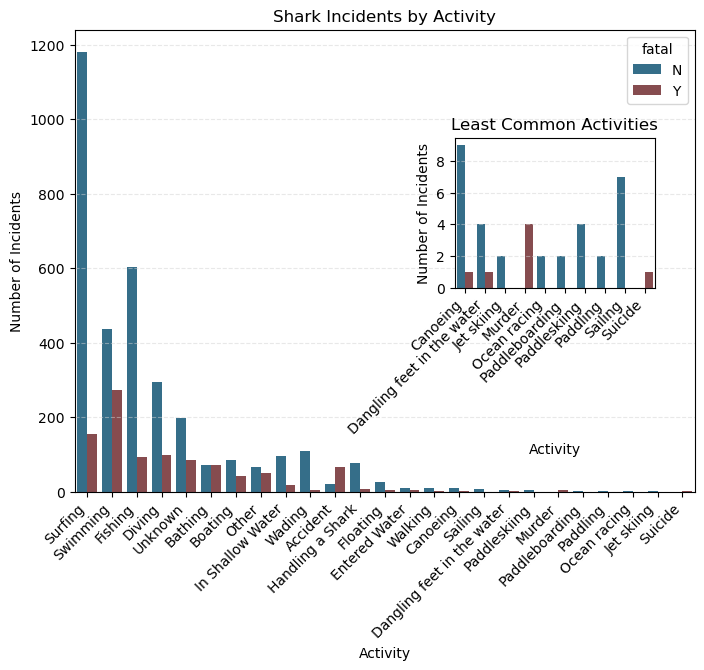

In [52]:
# create data frame with activity and fataly/n and remove nulls
bar_graph_data = df[["activity", "fatal"]].copy()
bar_graph_data.dropna(inplace=True)

# groupby data for activity and fatality
fatal_activities = bar_graph_data.groupby("activity")["fatal"].value_counts().unstack(fill_value=0)

# Reset index to flatten
fatal_activities = fatal_activities.reset_index()

# get fatal values seperate
fatal_activities_melted = fatal_activities.melt(id_vars=['activity'], value_vars=['N', 'Y'], var_name='fatal', value_name='count')

# Sort in descending order and find bottom counts 
order = fatal_activities_melted.groupby('activity')['count'].sum().sort_values(ascending=False).index
bottom_activities = fatal_activities_melted.groupby('activity')['count'].sum().nsmallest(10).index

# create 
colors = {"Y": "#904247", "N": "#277397"}
plt.figure(figsize=(8, 6))
sns.barplot(data=fatal_activities_melted, x='activity', y='count', hue='fatal', order=order, palette=colors)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Activity')
plt.ylabel('Number of Incidents')
plt.title('Shark Incidents by Activity')
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=.5)

# create insert for smallest values 
ax_inset = plt.axes([0.6, 0.45, 0.25, 0.25])  
sns.barplot(data=fatal_activities_melted[fatal_activities_melted['activity'].isin(bottom_activities)], 
            x='activity', y='count', hue='fatal', palette=colors, ax=ax_inset)
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Activity')
plt.ylabel('Number of Incidents')
plt.title('Least Common Activities')

ax_inset.legend().remove()

plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=.5)
plt.show()

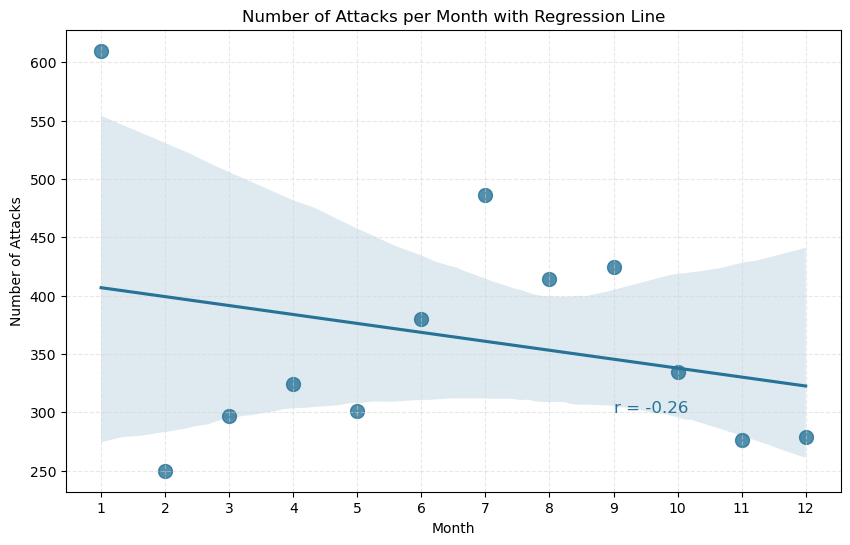

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the color
color = '#277397'

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Count attacks per month
attacks_per_month = df['month'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
sns.regplot(x=attacks_per_month.index, y=attacks_per_month.values, color=color, marker='o', scatter_kws={'s': 100})

# Calculate and print the correlation coefficient (r value)
r = np.corrcoef(attacks_per_month.index, attacks_per_month.values)[0, 1]
plt.text(9, 300, f"r = {r:.2f}", fontsize=12, color=color)

plt.title('Number of Attacks per Month with Regression Line')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(range(1, 13))  # Set ticks for each month
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.show()

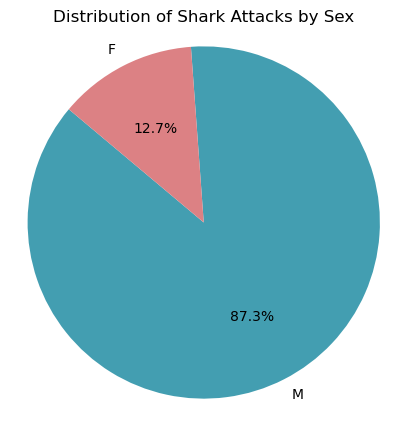

In [54]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'sex' column
sex_counts = df['sex'].value_counts()

# Define colors for female and male
colors = ['#439eb1', '#dc8184']

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Shark Attacks by Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

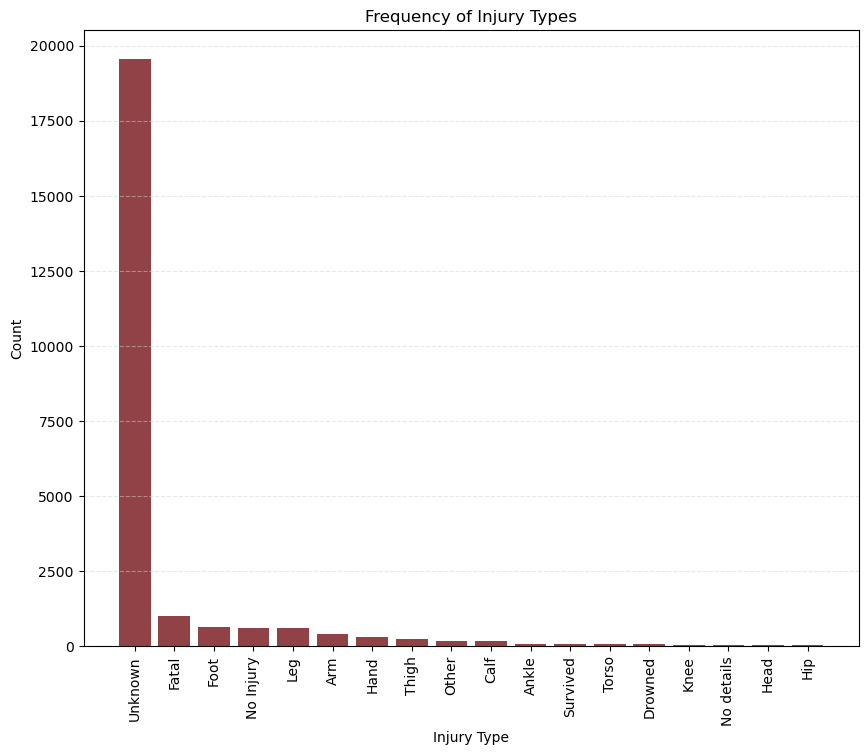

In [55]:
# bar chart of injury types
# create df of injuries and remove nulls and the not listed values
injury_data = df["injury"].copy()
# injury_data.dropna(inplace=True)
injury_data = injury_data.loc[injury_data != "Not Listed"]
# get data 
injury_counts = injury_data.value_counts()

# filter activites that are greater then 100 instances
top_injurys = injury_counts[injury_counts > 20]

# create canvas
plt.figure(figsize=(10,8))
plt.bar(top_injurys.index, top_injurys, color="#904247")

# customize
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.title('Frequency of Injury Types')
plt.xticks(rotation=90)
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=.5)

# show 
plt.show

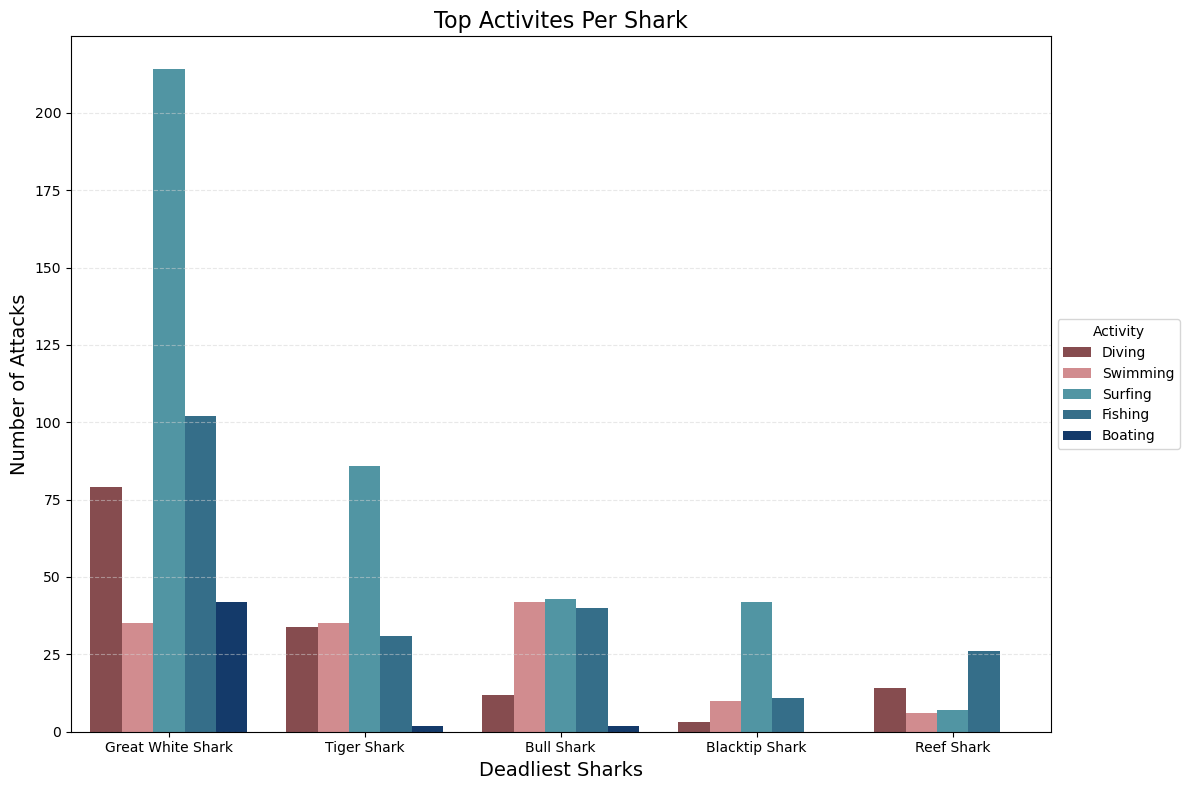

In [56]:
# graph of top 5 shark species and the top 5 activites recorded in their attacks
# make a data frame of activites and species to drop nulls and unrecorded values
species_activity = df[['species', 'activity', 'fatal']].copy()
species_activity.dropna(inplace=True)
species_activity = species_activity[(species_activity["species"] != "Unknown") & 
                                    (species_activity["species"] != "No Shark Sighted") &
                                    (species_activity["species"] != "Unidentified") &
                                    (species_activity["activity"] != "Not Recorded")]
# get top 5 species for fatalities
species_fatalities = species_activity.groupby('species')['fatal'].count()
top_species = species_fatalities.nlargest(5)

# get the activites for the 5 top species 
top_species_activities = species_activity[species_activity['species'].isin(top_species.index)]

# use filtered data to find the top activites per the 5 most fatal species
fatal_activites = top_species_activities.groupby('activity')['fatal'].count()
top_activites = fatal_activites.nlargest(5)

# create data with all filtered items
activites_per_species = top_species_activities[top_species_activities['activity'].isin(top_activites.index)]

# sort decending
sorted_per_species = activites_per_species.groupby('species')['fatal'].count().sort_values(ascending=False).index

# create graph
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]
plt.figure(figsize=(12, 8))
sns.countplot(x='species', hue='activity', data=activites_per_species, palette=colors, order=sorted_per_species)

#customize 

plt.legend(title='Activity', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Top Activites Per Shark', fontsize=16)
plt.xlabel('Deadliest Sharks', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=.5)
# show
plt.tight_layout()
plt.show()

In [57]:
print(species_activity)

                species          activity fatal
0     Great White Shark          Paddling     N
4           Tiger Shark            Diving     N
6           Tiger Shark          Swimming     Y
7           Lemon Shark           Fishing     N
8            Bull Shark           Walking     N
...                 ...               ...   ...
6276        Tiger Shark  In Shallow Water     Y
6293         Mako Shark           Fishing     Y
6294         Mako Shark           Fishing     Y
6295         Mako Shark           Fishing     Y
6296        Nurse Shark          Swimming     Y

[1438 rows x 3 columns]


In [58]:
print(top_species_activities)

                species          activity fatal
0     Great White Shark          Paddling     N
4           Tiger Shark            Diving     N
6           Tiger Shark          Swimming     Y
8            Bull Shark           Walking     N
10           Reef Shark  Handling a Shark     N
...                 ...               ...   ...
6245  Great White Shark           Unknown     N
6253         Bull Shark          Accident     Y
6265         Bull Shark          Swimming     Y
6274  Great White Shark           Boating     N
6276        Tiger Shark  In Shallow Water     Y

[1041 rows x 3 columns]


In [59]:
print(top_activites)

activity
Surfing     392
Fishing     210
Diving      142
Swimming    128
Boating      46
Name: fatal, dtype: int64


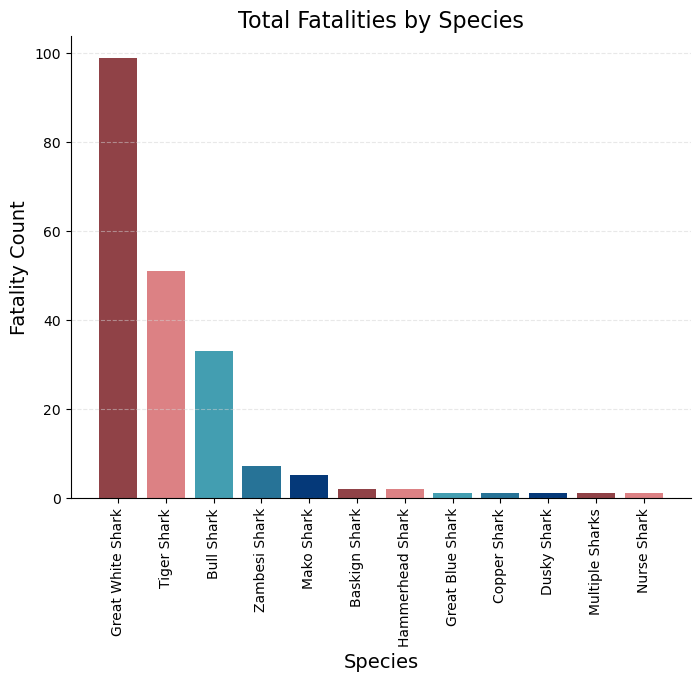

In [60]:
# make df for species vs fatality
fatality_by_species = df[["species", "fatal"]].copy()
fatality_by_species.dropna(inplace=True)
# remove unhelpful data for plot
fatality_by_species = fatality_by_species[(fatality_by_species["species"] != "Unknown") & 
                                    (fatality_by_species["species"] != "No Shark Sighted") &
                                    (fatality_by_species["species"] != "Unidentified")]
# get fatal attacks per species
fatality_counts = fatality_by_species[fatality_by_species["fatal"] == "Y"]["species"].value_counts()

# add pallette
colors = ["#904247", "#dc8184", "#439eb1", "#277397", "#053979"]

# create plot
plt.figure(figsize=(8, 6))
plt.bar(fatality_counts.index, fatality_counts, color=colors)

# label and customize
plt.title('Total Fatalities by Species', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Fatality Count', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

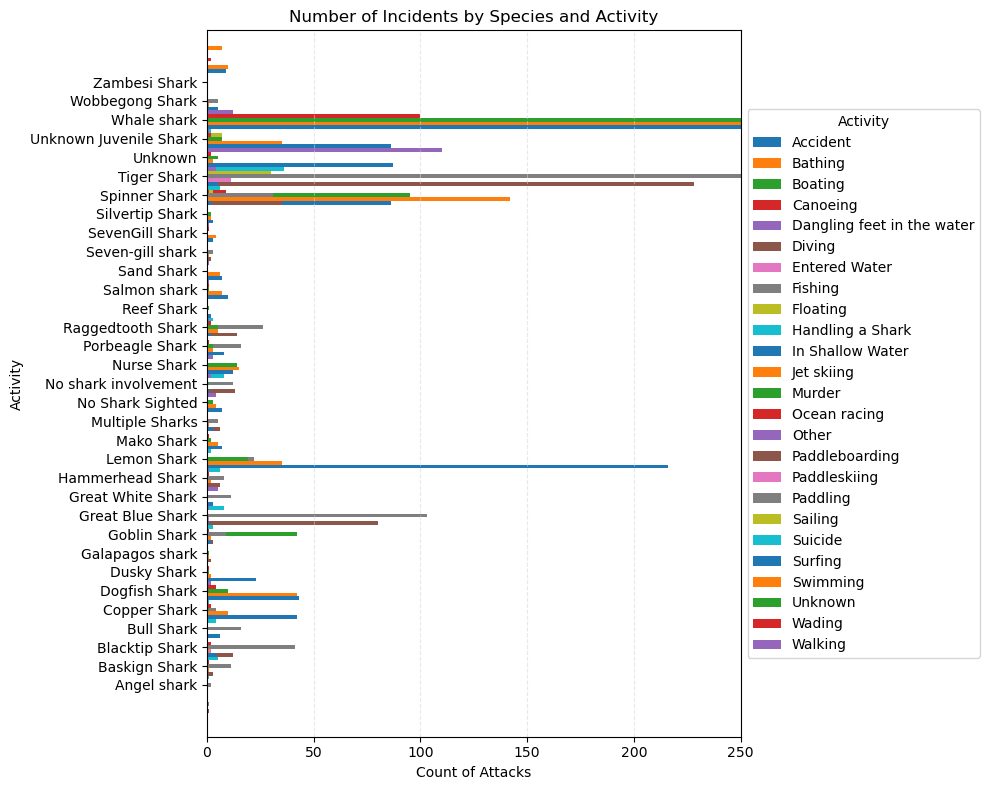

In [94]:
# graph of shark species vs what activity was recorded
# make a data frame of activites and species to drop nulls and unrecorded values
species_activity = df[["species", "activity"]].copy()
species_activity.dropna(inplace=True)
species_activity = species_activity[(species_activity["species"] != "Unknown Shark") & 
                                    (species_activity["species"] != "Unidentified") & 
                                    (species_activity["species"] != "Not Recorded") & 
                                    (species_activity["activity"] != "Not Recorded")] 
# get data
data = species_activity.groupby(["species", "activity"]).size().unstack(fill_value=0)

# create
data.plot(kind="barh", figsize=(10, 8), width=5, stacked=False)

#customize 
plt.xlim(0, 250)
plt.legend(title='Activity', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Number of Incidents by Species and Activity')
plt.xlabel('Count of Attacks')
plt.ylabel('Activity')
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=.5)
# show
plt.tight_layout()
plt.show()

In [62]:
df.groupby("age").size()

age
             2
10          47
10 or 12     1
11          33
12          59
            ..
mid-20s      1
mid-30s      1
teen         5
young        1
             1
Length: 121, dtype: int64

In [63]:
df.fatal.value_counts()

N          3319
Y           981
Unknown      53
Name: fatal, dtype: int64

In [64]:
ages = ['57', '11', '48', '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '68', '51', '39', '58',
       '47', '61', '65', '36', '66', '43', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '53',
        '77', '74', '5', '86',
        '84', '75']
df2 = df.loc[df.age.isin(ages)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2525 entries, 0 to 6301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2466 non-null   datetime64[ns]
 1   year      2466 non-null   float64       
 2   type      2524 non-null   object        
 3   country   2520 non-null   object        
 4   area      2454 non-null   object        
 5   location  2431 non-null   object        
 6   activity  2525 non-null   object        
 7   sex       2510 non-null   object        
 8   age       2525 non-null   object        
 9   injury    2525 non-null   object        
 10  fatal     2364 non-null   object        
 11  time      1792 non-null   object        
 12  species   2525 non-null   object        
 13  month     2466 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 295.9+ KB


In [65]:
df2["age"] = pd.to_numeric(df2["age"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2525 entries, 0 to 6301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2466 non-null   datetime64[ns]
 1   year      2466 non-null   float64       
 2   type      2524 non-null   object        
 3   country   2520 non-null   object        
 4   area      2454 non-null   object        
 5   location  2431 non-null   object        
 6   activity  2525 non-null   object        
 7   sex       2510 non-null   object        
 8   age       2525 non-null   int64         
 9   injury    2525 non-null   object        
 10  fatal     2364 non-null   object        
 11  time      1792 non-null   object        
 12  species   2525 non-null   object        
 13  month     2466 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 295.9+ KB


C:\Users\Kelsey\AppData\Local\Temp\ipykernel_19200\3601731725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["age"] = pd.to_numeric(df2["age"])


In [66]:
age_df = df2.groupby("age").size().reset_index()
age_df.columns = ["age", "num_attacks"]
age_df.head()

,age,num_attacks
0,3,3
1,5,6
2,6,13
3,7,21
4,8,19


In [67]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          75 non-null     int64
 1   num_attacks  75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


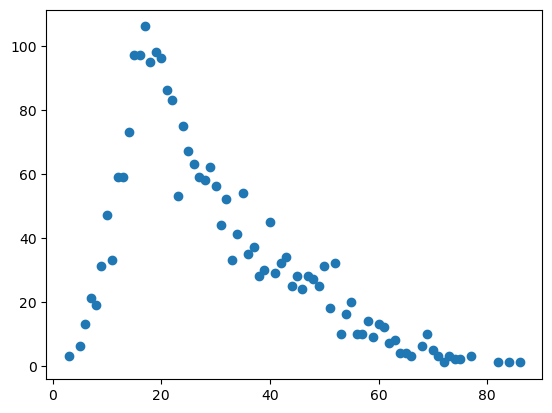

In [68]:
plt.scatter(age_df.age, age_df.num_attacks)
plt.show()

In [69]:
age_df_young = age_df[age_df["age"] <= 20 ]
age_df_old = age_df[age_df["age"] > 20 ]

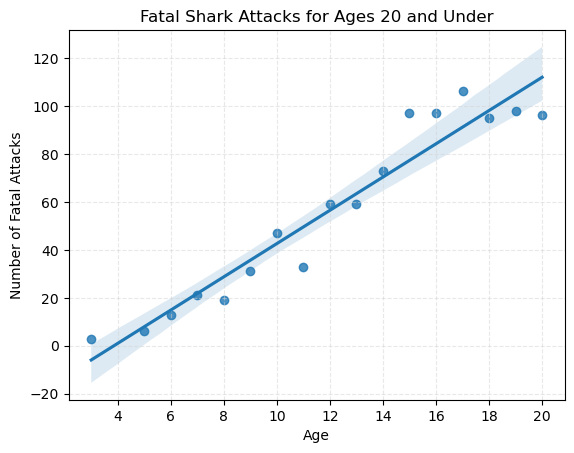

In [70]:
# use seaborns regplot to make a linear regression showing replationship between age and fataliy of attacks
# for 20 and under:
sns.regplot(x="age", y="num_attacks", data=age_df_young)

# label
plt.title("Fatal Shark Attacks for Ages 20 and Under")
plt.xlabel("Age")
# use matplotlibs ticker mod to set x labels as whole ints
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylabel("Number of Fatal Attacks")
plt.grid(color="lightgrey", linestyle="--", alpha=.5)

plt.show()

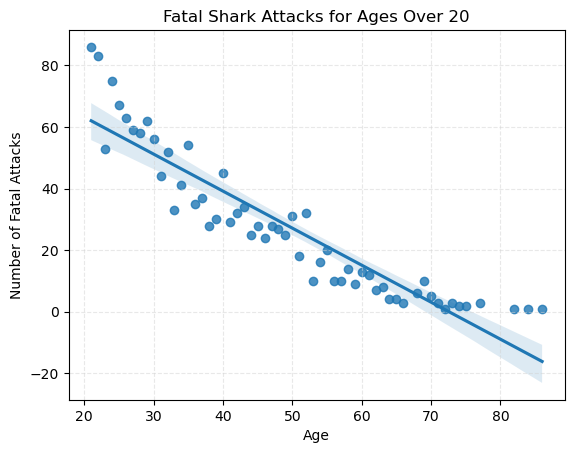

In [71]:
# use seaborns regplot to make a linear regression showing replationship between age and fataliy of attacks
# for 21 and over:
sns.regplot(x="age", y="num_attacks", data=age_df_old)

#label
plt.title("Fatal Shark Attacks for Ages Over 20")
plt.xlabel("Age")
plt.ylabel("Number of Fatal Attacks")
plt.grid(color="lightgrey", linestyle="--", alpha=.5)


plt.show()

In [72]:
df3 = df2.loc[df2.fatal != "UNKNOWN", ["age", "fatal"]].dropna(how="any")
df3["fatal"] = df3.fatal.apply(lambda x: 1 if x == "Y" else 0)
df3.fatal.value_counts()


0    2011
1     353
Name: fatal, dtype: int64

In [73]:
df3.head()

,age,fatal
0,57,0
1,11,0
2,48,0
6,18,1
7,52,0


### T Tests and Correlations

In [74]:
df3.groupby('age').describe()

fatal                                               
    count      mean       std  min   25%  50%   75%  max
age                                                     
3     3.0  0.333333  0.577350  0.0  0.00  0.0  0.50  1.0
5     6.0  0.166667  0.408248  0.0  0.00  0.0  0.00  1.0
6    13.0  0.076923  0.277350  0.0  0.00  0.0  0.00  1.0
7    18.0  0.166667  0.383482  0.0  0.00  0.0  0.00  1.0
8    17.0  0.117647  0.332106  0.0  0.00  0.0  0.00  1.0
..    ...       ...       ...  ...   ...  ...   ...  ...
75    1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
77    2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
82    1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
84    1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
86    1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0

[75 rows x 8 columns]

In [75]:
# t test for ages v fatal
# Null - There is no significat difference between the number of fatalities of ages over 20 vs under 20
# alt - There is a difference bweteen the age groups

In [76]:
under_20 = df3.loc[df3['age'] <= 20, 'fatal']
over_20 = df3.loc[df3['age'] > 20, 'fatal']


In [77]:
under_20.describe()

count    898.000000
mean       0.139198
std        0.346346
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fatal, dtype: float64

In [78]:
over_20.describe()

count    1466.000000
mean        0.155525
std         0.362528
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fatal, dtype: float64

In [79]:
stats.ttest_ind(over_20, under_20, equal_var = False)

TtestResult(statistic=1.092772729914365, pvalue=0.27462765054602994, df=1963.521011148307)

In [80]:
# with the low pvalue - accept the null hypothesis 
# There is no significat difference between the number of fatalities of ages over 20 vs under 20

In [81]:
df3.groupby("fatal").mean()

,age
fatal,
0,28.003481
1,28.988669


In [82]:
df3.corr()

,age,fatal
age,1.000000,0.024395
fatal,0.024395,1.000000


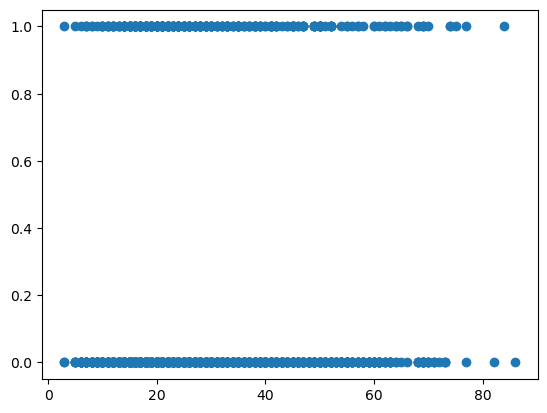

In [83]:
plt.scatter(df3.age, df3.fatal)
plt.show()

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2525 entries, 0 to 6301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2466 non-null   datetime64[ns]
 1   year      2466 non-null   float64       
 2   type      2524 non-null   object        
 3   country   2520 non-null   object        
 4   area      2454 non-null   object        
 5   location  2431 non-null   object        
 6   activity  2525 non-null   object        
 7   sex       2510 non-null   object        
 8   age       2525 non-null   int64         
 9   injury    2525 non-null   object        
 10  fatal     2364 non-null   object        
 11  time      1792 non-null   object        
 12  species   2525 non-null   object        
 13  month     2466 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 295.9+ KB


In [85]:
df.age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '9 months', '25 to 35', '33 & 37', '34 & 19',
       '2 to 3 months', '7 or 8', '10 or 12', '31 or 33', '2½', 'young

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24173 entries, 0 to 25722
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      4377 non-null   datetime64[ns]
 1   year      4377 non-null   float64       
 2   type      4748 non-null   object        
 3   country   4717 non-null   object        
 4   area      4404 non-null   object        
 5   location  4338 non-null   object        
 6   activity  24173 non-null  object        
 7   sex       4384 non-null   object        
 8   age       2599 non-null   object        
 9   injury    24173 non-null  object        
 10  fatal     4353 non-null   object        
 11  time      2286 non-null   object        
 12  species   24173 non-null  object        
 13  month     4377 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 3.3+ MB


In [87]:
df.head(20)

,date,year,type,country,area,location,activity,sex,age,injury,fatal,time,species,month
0,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,No Injury,N,18h00,Great White Shark,6.0
1,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",In Shallow Water,F,11,Thigh,N,14h00 -15h00,Unknown,6.0
2,2018-06-09,2018.0,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Leg,N,07h45,Unknown,6.0
3,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Leg,N,NaN,Unknown,6.0
4,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,M,NaN,Leg,N,NaN,Tiger Shark,6.0
5,2018-06-03,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Surfing,M,NaN,No Injury,N,NaN,Unknown,6.0
6,2018-06-03,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,Fatal,Y,Late afternoon,Tiger Shark,6.0
7,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Foot,N,NaN,Lemon Shark,5.0
8,2018-05-26,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Leg,N,17h00,Bull Shark,5.0
9,2018-05-26,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",In Shallow Water,M,12,Foot,N,14h00,Unknown,5.0


In [88]:
# try out a t test to see if gender makes a difference on fatality of attacks

# hypothesis: 
# null - there is no difference in fatal liklyhood in attacks between women and men
# alt - there is a difference between fatal probabilty between women and men

# get a data for fatal attacks and age
# df4 = df[df["fatal"] == "Y"] 
df4 = df.dropna(subset=['sex'])
df4 = df4[df4['sex'] != "NaN"]
gender_fatal = df4[['sex', 'fatal']]
gender_fatal['fatal'] = gender_fatal.fatal.apply(lambda x: 1 if x == "Y" else 0)
gender_fatal.head(10)

C:\Users\Kelsey\AppData\Local\Temp\ipykernel_19200\1291431993.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_fatal['fatal'] = gender_fatal.fatal.apply(lambda x: 1 if x == "Y" else 0)


,sex,fatal
0,F,0
1,F,0
2,M,0
3,M,0
4,M,0
5,M,0
6,M,1
7,M,0
8,M,0
9,M,0


In [89]:
gender_fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4384 entries, 0 to 6301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     4384 non-null   object
 1   fatal   4384 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 102.8+ KB


In [90]:
gender_fatal.groupby('sex').describe()

fatal                                             
      count      mean       std  min  25%  50%  75%  max
sex                                                     
F     558.0  0.136201  0.343309  0.0  0.0  0.0  0.0  1.0
M    3826.0  0.218244  0.413108  0.0  0.0  0.0  0.0  1.0

In [91]:
male_fatalities = gender_fatal.loc[df4.sex == "M", 'fatal']
female_fatalities = gender_fatal.loc[df4.sex == "F", 'fatal']

In [92]:
stats.ttest_ind(male_fatalities, female_fatalities, equal_var = False)

TtestResult(statistic=5.129425837535572, pvalue=3.637409207818012e-07, df=811.8176467316616)

In [93]:
# reject the null hypothesis and accept the alt - there is a significant difference between the means of women and men